## Device Price Classification System

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [50]:
train_path = 'dataset/train - train.csv' 
test_path = 'dataset/test - test.csv'
main_train_data  = pd.read_csv(train_path)
main_test_data = pd.read_csv(test_path)

In [51]:
main_train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Check for missing values
print(main_train_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


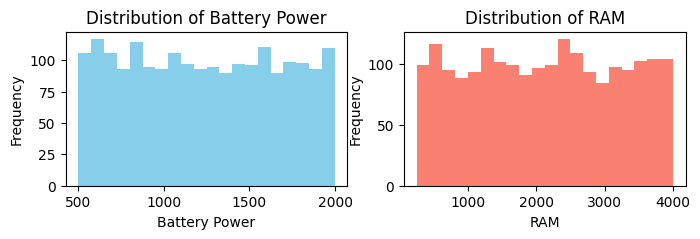

In [6]:
# visualize the distribution of battery_power, ram, and price_range.
plt.figure(figsize=(8, 2)) 
plt.subplot(1, 2, 1) 
plt.hist(main_train_data['battery_power'], bins=20, color='skyblue') 
plt.xlabel('Battery Power') 
plt.ylabel('Frequency') 
plt.title('Distribution of Battery Power')

plt.subplot(1, 2, 2) 
plt.hist(main_train_data['ram'], bins=20, color='salmon') 
plt.xlabel('RAM') 
plt.ylabel('Frequency') 
plt.title('Distribution of RAM')
plt.show()

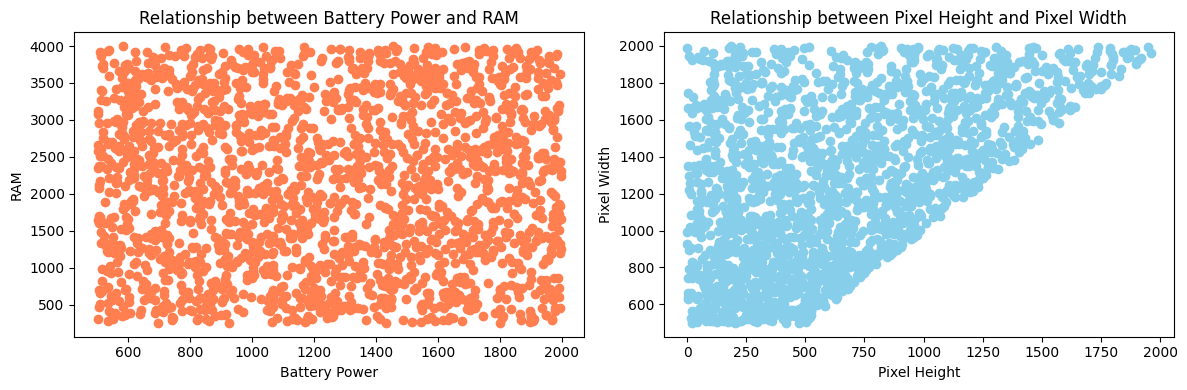

In [7]:
# explore relationships between  battery_power vs ram and px_height vs px_width
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plt.scatter(main_train_data['battery_power'], main_train_data['ram'], color='coral') 
plt.xlabel('Battery Power') 
plt.ylabel('RAM') 
plt.title('Relationship between Battery Power and RAM')

plt.subplot(1, 2, 2) 
plt.scatter(main_train_data['px_height'], main_train_data['px_width'], color='skyblue') 
plt.xlabel('Pixel Height') 
plt.ylabel('Pixel Width') 
plt.title('Relationship between Pixel Height and Pixel Width')
plt.tight_layout() 
plt.show()

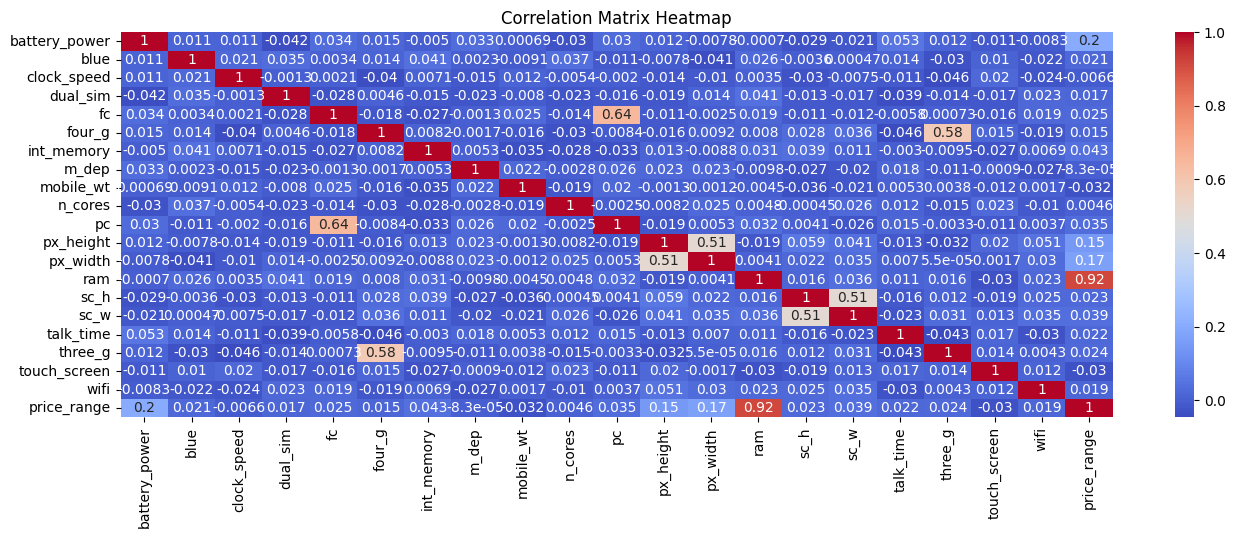

In [8]:
# correlation between different numerical features in the datase
plt.figure(figsize=(16, 5)) 
sns.heatmap(main_train_data.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap') 
plt.show()

From the correlation heatmap, we can say that there are only few features that are correlated such as fc and pc, four_g and three_g, ram and price_range, pc and fc etc.

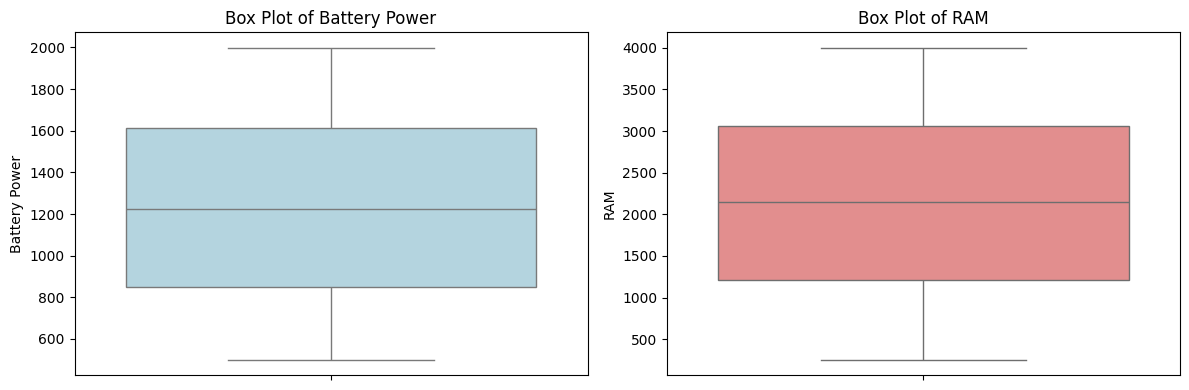

In [9]:
# potential outliers in battery_power and ram
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
sns.boxplot(y='battery_power', data=main_train_data, color='lightblue') 
plt.ylabel('Battery Power') 
plt.title('Box Plot of Battery Power')

plt.subplot(1, 2, 2) 
sns.boxplot(y='ram', data=main_train_data, color='lightcoral') 
plt.ylabel('RAM') 
plt.title('Box Plot of RAM')
plt.tight_layout() 
plt.show()

We can observe from the box plot that the battery power and RAM shows a normal distribution and no outliers.

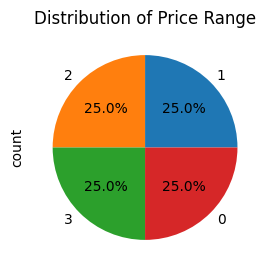

In [10]:
# distribution of price_range values in the dataset
plt.figure(figsize=(3, 3)) 
main_train_data['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Price Range') 
plt.show()

From this pie chart we can observe that, the dataset is perfectly balanced.

In [53]:
# drop null values
main_train_data = main_train_data.dropna()

In [54]:
# extract independent and dependet features
X = main_train_data.drop(['price_range'], axis=1)
Y = main_train_data['price_range']
main_test_data = main_test_data.drop(['id'], axis=1)

In [29]:
# for finding the best algorithm and fin tunning purpose the train data will be splitted to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
data_in = [x_train_scaled, y_train, x_test_scaled, y_test]

In [39]:
def train_to_predict(model_type, param, data):
    x_train, y_train, x_test, y_test = data
    model = GridSearchCV(model_type, param, cv=5, n_jobs=-1, scoring='accuracy', refit='accuracy') 
    model.fit(x_train, y_train)
    train_score = model.best_score_
    tunned_model = model.best_estimator_
    y_pred = tunned_model.predict(x_test)
    test_score = accuracy_score(y_test, y_pred)
    return train_score, test_score, tunned_model

In [40]:
def training_center(data):
    classifiers = [
        LogisticRegression(solver='liblinear', random_state=42), RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        ExtraTreesClassifier(random_state=42), KNeighborsClassifier(), 
        DecisionTreeClassifier(random_state=42),
        MLPClassifier(random_state=42), AdaBoostClassifier(random_state=42),
        XGBClassifier(),
        ]

    parameters = {
        "LR": {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]},
        'RF': {"max_depth": range(5,20,5),"n_estimators": range(100,1000,200), "min_samples_leaf": range(1,30,2),},
        "GB": {"learning_rate":[0.001,0.01,0.1], "n_estimators":range(1000,2000,200), "criterion": ["friedman_mse",  "squared_error"],
               "max_features":["log2","sqrt"], "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
        'EXT': {"criterion": ["gini", "entropy"], "max_depth": range(10,30,5), "min_samples_leaf": range(1,30,2), "n_estimators":range(100,2000,200)},
        'KN': {'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'], 'metric' : ['minkowski','euclidean','manhattan']},
        "DT": { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy", 'log_loss']},
        'MLP': {'hidden_layer_sizes': [(10,30,10),(20,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],},
        'AB': {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20], 'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
               'algorithm': ['SAMME', 'SAMME.R']},
        'XGB': {'n_estimators': [100, 200, 500], 'learning_rate': [0.01,0.05,0.1], 'booster': ['gbtree', 'gblinear'], 
                'gamma': [0, 0.5, 1],'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5], 'base_score': [0.2, 0.5, 1]},
        }
                
    classifers_name = [
        'LR', 'RF', 'GB',  'EXT', 'KN', 'DT', 
        'MLP', 'AB', "XGB",
        ]
    
    get_result = {}
    for clf, name in zip(classifiers, classifers_name):
        # print(f"Training model {name} started ...")
        st = time.time()
        train_acc, test_acc, best_model = train_to_predict(model_type=clf, param=parameters[name], data=data)
        en = time.time()
        # print(f"endeed")
        get_result[name] = [round(train_acc,3), round(test_acc,3), round((en-st)/60,2)]
        with open(f'mides_result/{name}.pkl', 'wb') as file:
            pickle.dump(best_model, file)
    index = ['train', 'test', 'time']
    return pd.DataFrame(data=get_result, index=index)

In [ ]:
# training 
# result = training_center(data_in) # uncomment this line to train the models
result.to_csv(f"mides_result/score.csv")

In [9]:
# performance of all machine learning algorithms trained and optimized on the data
performance = pd.read_csv('mides_result/score.csv', index_col=0)
performance

,LR,RF,GB,EXT,KN,DT,MLP,AB,XGB
train,0.849,0.888,0.898,0.877,0.602,0.845,0.942,0.727,0.910
test,0.892,0.890,0.920,0.902,0.634,0.862,0.957,0.647,0.927
time,0.110,4.450,61.880,27.690,0.010,0.010,0.410,0.080,9.370


In [55]:
# Since MLP performed better, we will use it to make prediction on the test data
with open('mides_result/MLP.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# normalize test data the same as the training data
scaler = StandardScaler()
normalized_test_data = scaler.fit_transform(main_test_data)
prediction = loaded_model.predict(normalized_test_data)

In [56]:
# check prediction 
aa = list(prediction)
k = {}
for i in np.unique(aa):
    k[i] = aa.count(i)
print("Prediction on the test data by the best model\n", k)

Prediction on the test data by the best model
 {0: 256, 1: 228, 2: 256, 3: 260}


<li> 0 low cost
<li> 1 medium cost
<li> 2 high cost
<li> 3 very high cost